In [3]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('/content/drive/MyDrive/percobaan.jpg')

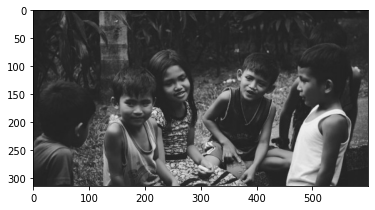

In [4]:
# menampilkan gambar
plt.imshow(img, cmap='gray')

In [5]:
# mengonversi gambar menjadi array numpy
img = np.asarray(img)

(array([7.50000e+01, 5.70000e+02, 3.60450e+04, 1.38138e+05, 8.72670e+04,
        3.81120e+04, 3.38970e+04, 1.99920e+04, 1.88730e+04, 1.24410e+04,
        1.33620e+04, 9.42900e+03, 1.06680e+04, 7.80300e+03, 8.87100e+03,
        7.06500e+03, 8.06700e+03, 6.30600e+03, 7.83300e+03, 5.76900e+03,
        6.62400e+03, 5.32200e+03, 6.37500e+03, 4.34700e+03, 5.74500e+03,
        4.51200e+03, 5.42700e+03, 4.26000e+03, 5.21700e+03, 4.32600e+03,
        5.05500e+03, 3.65400e+03, 4.25100e+03, 2.86200e+03, 3.06600e+03,
        2.01600e+03, 2.51700e+03, 1.73700e+03, 1.87200e+03, 1.40100e+03,
        1.49100e+03, 1.05600e+03, 1.44000e+03, 1.68600e+03, 3.03000e+03,
        2.36700e+03, 2.02200e+03, 1.75800e+03, 9.30000e+02, 5.10000e+01]),
 array([ 22. ,  26.5,  31. ,  35.5,  40. ,  44.5,  49. ,  53.5,  58. ,
         62.5,  67. ,  71.5,  76. ,  80.5,  85. ,  89.5,  94. ,  98.5,
        103. , 107.5, 112. , 116.5, 121. , 125.5, 130. , 134.5, 139. ,
        143.5, 148. , 152.5, 157. , 161.5, 166. , 170.5

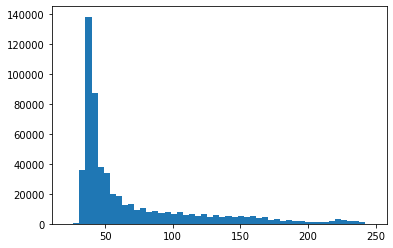

In [6]:
# letakkan piksel dalam larik 1D dengan meratakan larik img
flat = img.flatten()

# menunjukkan histogram
plt.hist(flat, bins=50)

In [7]:
# rumus untuk membuat histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

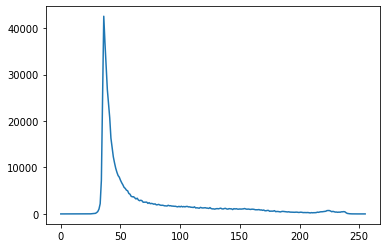

In [9]:
# buat fungsi histogram kita sendiri
def get_histogram(image, bins):
    # array dengan ukuran tempat sampah, atur ke nol
    histogram = np.zeros(bins)
    
    # loop melalui piksel dan jumlahkan jumlah piksel
    for pixel in image:
        histogram[pixel] += 1
    
    # mengembalikan hasil akhir 
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

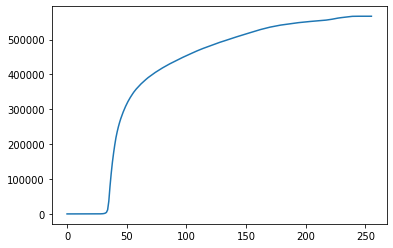

In [11]:
# buat fungsi penjumlahan kumulatif 
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

In [12]:
# formula untuk menghitung jumlah kumulatif
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

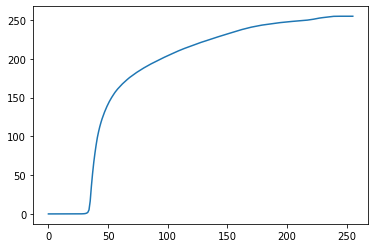

In [13]:
# re-normalize nilai cumsum antara 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

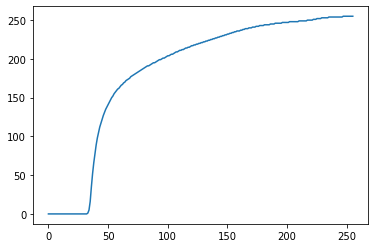

In [14]:
# melemparkannya kembali ke uint8 karena kita tidak dapat menggunakan nilai floating point dalam gambar
cs = cs.astype('uint8')

plt.plot(cs)

(array([11625.,     0.,     0., 25065.,     0.,     0., 42570.,     0.,
            0.,     0., 36870.,     0., 31926.,     0.,     0., 26772.,
            0., 23619.,     0., 20685., 16320., 14328., 12315., 11010.,
         9855.,  8979.,  8268., 15174., 12993., 11220., 10095., 12423.,
        10857., 12441., 10836., 11955., 10668., 11496., 10557., 11382.,
        14031., 10872., 11697., 11184., 10923., 10716., 11499., 11358.,
        10914., 11502.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

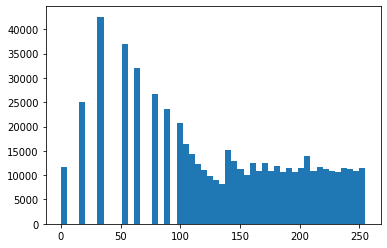

In [15]:
# dapatkan nilai dari jumlah kumulatif untuk setiap indeks di flat, dan atur sebagai img_new
img_new = cs[flat]

# kita melihat histogram yang jauh lebih merata
plt.hist(img_new, bins=50)

In [16]:
# letakkan array kembali ke bentuk aslinya karena saya meratakannya
img_new = np.reshape(img_new, img.shape)
img_new

array([[[52, 52, 52],
        [52, 52, 52],
        [35, 35, 35],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [16, 16, 16]],

       [[52, 52, 52],
        [52, 52, 52],
        [35, 35, 35],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [16, 16, 16]],

       [[66, 66, 66],
        [52, 52, 52],
        [35, 35, 35],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [16, 16, 16]],

       ...,

       [[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [78, 78, 78]],

       [[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [78, 78, 78]],

       [[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [78, 78, 78]]], dtype=uint8)

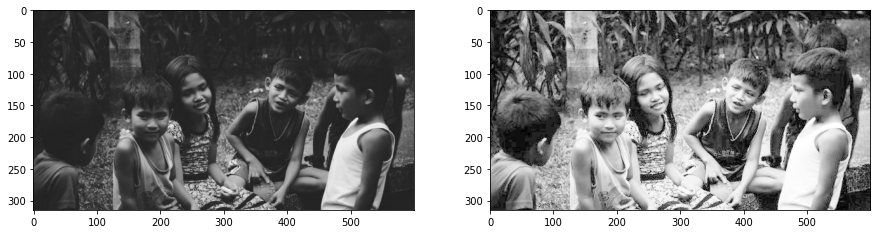

In [17]:
# mengatur tampilan gambar berdampingan
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# menampilkan gambar baru
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)